## Graphical User Interface (GUI)
* Interactive envinvironment to accept response from users
    * Forms, documents etc.
* Easier to interact with program as against the Command Line Interface (CLI)

## Libraries:
* Tkinter
    * a popular GUI Libraries
    * Provides diverse widgets such as labels, buttons, text boxes, checkboxes. 
    
        


## Data Visualization: 
* Provide insights with some type of visual representation. 
    * Graphs, Charts, complex dashboards
* Usually using specialized softwares
    * Tableau, Power BI
* Data visualization is becoming one of popular skills
    * high demand

1. Bar Charts: 
    * One of the most popular
    * Number of Enrollment by Course
    * Average Snowdays by Month
2. Time Series
    * visualize and compare over a period of Time
    * Stock Market returns

3. Map Data
    * plot over geographical coordinates
    * Diversity across all counties in Iowa
    
4. Graphs    
    * Complex systems where interaction between elements is important
    * Infrastructure, Social networking
5. Heatmap
    * Show relationship between variables. 


### Install Matplot
Since this package isn't preinstalled with Pythom, you have to install it.
```
 python3 -m pip install matplotlib --user
``` 


Text(0, 0.5, 'Population/Num Households')

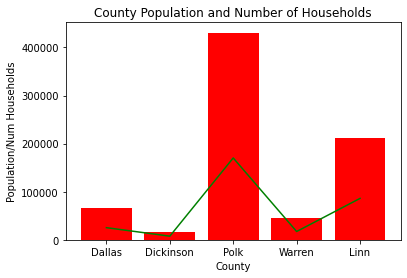

In [18]:
import os as os
import csv
import matplotlib.pyplot as plt

# Initialize three empty lists
county_label,county_population,county_num_households = ([] for i in range(3))
#fileName = os.path.join(os.path.dirname(__file__), 'example.csv')
with open('example.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        # skip the first line in the file because it is the header
        if line_count == 0:
            line_count += 1
            continue
        county_label.append(row[0])
        county_population.append(int(row[1].replace(",", ""))) #removes commas when adding to list
        county_num_households.append(int(row[2].replace(",",""))) #removes commas when adding to list

plot_count = []
for v in range(len(county_label)):
    plot_count.append(v)

# Bar chart of population by county
plt.bar(plot_count, county_population, color='red')
# line chart of number of households by county
plt.plot(plot_count, county_num_households, color='green')
# Override plot_count values with proper labels
plt.xticks(plot_count, county_label)
# chart title
plt.title('County Population and Number of Households')
# chart x-axis label
plt.xlabel('County')
# chart y-axis label
plt.ylabel('Population/Num Households')


## Database
To persits data
Commonly used Database:
* PostgreSQL
* SQL Server
* Oracle
* RDS
* SQLite
    [Download](https://www.sqlite.org/download.html)



In [19]:
import sqlite3
from sqlite3 import Error


def create_connection(db):
    """ Connect to a SQLite database """
    try:
        conn = sqlite3.connect(db)
        print(sqlite3.version)
    except Error as err:
        print(err)
    finally:
        conn.close()


if __name__ == '__main__':
    create_connection("pythonsqlite.db")

2.6.0


## Create Table:
* Create a Connection object using connect() function
* Create a Cursor Object by calling the cursor method of the Connection Object
* Pass the CREATE TABLE statement to the execute() method of the Cursor object

```
    CREATE TABLE IF NOT EXISTS person (
                                        id integer PRIMARY KEY,
                                        firstname text NOT NULL,
                                        lastname text NOT NULL
                                    ); 
    CREATE TABLE IF NOT EXISTS student (
                                    id integer PRIMARY KEY,
                                    major text NOT NULL,
                                    begin_date text NOT NULL,
                                    end_date text,
                                    FOREIGN KEY (id) REFERENCES person (id)
                                );                                
```


In [20]:
import sqlite3
from sqlite3 import Error


def create_connection(db):
    """ Connect to a SQLite database
    :param db: filename of database
    :return connection if no error, otherwise None"""
    try:
        conn = sqlite3.connect(db)
        return conn
    except Error as err:
        print(err)
    return None

def create_table(conn, sql_create_table):
    """ Creates table with give sql statement
    :param conn: Connection object
    :param sql_create_table: a SQL CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(sql_create_table)
    except Error as e:
        print(e)

def create_tables(database):

    sql_create_person_table = """ CREATE TABLE IF NOT EXISTS person (
                                        id integer PRIMARY KEY,
                                        firstname text NOT NULL,
                                        lastname text NOT NULL
                                    ); """

    sql_create_student_table = """CREATE TABLE IF NOT EXISTS student (
                                    id integer PRIMARY KEY,
                                    major text NOT NULL,
                                    begin_date text NOT NULL,
                                    end_date text,
                                    FOREIGN KEY (id) REFERENCES person (id)
                                );"""

    # create a database connection
    conn = create_connection(database)
    if conn is not None:
        # create projects table
        create_table(conn, sql_create_person_table)
        # create tasks table
        create_table(conn, sql_create_student_table)
    else:
        print("Unable to connect to " + str(database))

if __name__ == '__main__':
    create_tables("pythonsqlite.db")

## Add Data to Person & Student Tables
* Connect to the Database
* Create a Cursor Object by calling the cursor method of the Connection Object
* Execute the Insert statement. To pass arguments to teh insert statement, add a question mark(?) as a placeholder

In [23]:
import sqlite3
from sqlite3 import Error


def create_connection(db):
    """ Connect to a SQLite database
    :param db: filename of database
    :return connection if no error, otherwise None"""
    try:
        conn = sqlite3.connect(db)
        return conn
    except Error as err:
        print(err)
    return None


def create_person(conn, person):
    """Create a new person for table
    :param conn:
    :param person:
    :return: person id
    """
    sql = ''' INSERT INTO person(firstname,lastname)
              VALUES(?,?) '''
    cur = conn.cursor()  # cursor object
    cur.execute(sql, person)
    return cur.lastrowid # returns the row id of the cursor object, the person id


def create_student(conn, student):
    """Create a new person for table
    :param conn:
    :param student:
    :return: student id
    """
    sql = ''' INSERT INTO student(id, major, begin_date)
              VALUES(?,?,?) '''
    cur = conn.cursor()  # cursor object
    cur.execute(sql, student)
    return cur.lastrowid # returns the row id of the cursor object, the student id


if __name__ == '__main__':
    conn = create_connection("pythonsqlite.db")
    with conn:
        person = ('Rob', 'Thomas')
        person_id = create_person(conn, person)

        student = (person_id, 'CIS', '2000-01-01')
        student_id = create_student(conn, student)

## Query a table
* Create a connection to the database
* Create a Cursor object using the cursor method of the Connection object
* Execute the SELECT statement
* Call fetchall() method of the cursor object to fetch the data
* Loop through the cursor and process each row 



In [24]:
import sqlite3
from sqlite3 import Error


def create_connection(db):
    """ Connect to a SQLite database
    :param db: filename of database
    :return connection if no error, otherwise None"""
    try:
        conn = sqlite3.connect(db)
        return conn
    except Error as err:
        print(err)
    return None


def select_all_persons(conn):
    """Query all rows of person table
    :param conn: the connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM person")

    rows = cur.fetchall()

    return rows # return the rows


if __name__ == '__main__':
    conn = create_connection("pythonsqlite.db")
    with conn:
        rows = select_all_persons(conn)
        for row in rows:
            print(row)

(1, 'Rob', 'Thomas')
(2, 'Rob', 'Thomas')


## Update Data in a table
* Create a database connection using connect() method
* Create a Cursor object by calling the cursor() method of Connection object
* Execute the Update statement 

In [25]:
import sqlite3
from sqlite3 import Error


def create_connection(db):
    """ Connect to a SQLite database
    :param db: filename of database
    :return connection if no error, otherwise None"""
    try:
        conn = sqlite3.connect(db)
        return conn
    except Error as err:
        print(err)
    return None


def update_person(conn, person):
    """Update lastname and firstname of person
    :param conn:
    :param person:
    :return: person id
    """
    sql = ''' UPDATE person
              SET lastname = ? ,
                  firstname = ? 
              WHERE id = ?'''
    cur = conn.cursor()
    cur.execute(sql, person)


def select_all_persons(conn):
    """Query all rows of person table
    :param conn: the connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM person")

    rows = cur.fetchall()

    return rows # return the rows


if __name__ == '__main__':
    conn = create_connection("pythonsqlite.db")
    with conn:

        person = ('Thomas', 'Robert', 1)
        update_person(conn, person)

        rows = select_all_persons(conn)
        for row in rows:
            print(row)

(1, 'Robert', 'Thomas')
(2, 'Rob', 'Thomas')


## Delete Data in a table
* Create a database connection using connect() method
* Create a Cursor object by calling the cursor() method of Connection object
* Execute the DELETE statement 

In [26]:
import sqlite3
from sqlite3 import Error


def create_connection(db):
    """ Connect to a SQLite database
    :param db: filename of database
    :return connection if no error, otherwise None"""
    try:
        conn = sqlite3.connect(db)
        return conn
    except Error as err:
        print(err)
    return None


def select_all_persons(conn):
    """Query all rows of person table
    :param conn: the connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM person")

    rows = cur.fetchall()

    return rows # return the rows


def select_all_students(conn):
    """Query all rows of person table
    :param conn: the connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM student")

    rows = cur.fetchall()

    return rows # return the rows


def delete_person(conn, id):
    """Delete a person by person id
    :param conn: database connection
    :param id: id of the person
    :return:
    """
    sql = 'DELETE FROM person WHERE id=?'
    cur = conn.cursor()
    cur.execute(sql, (id,))


if __name__ == '__main__':
    conn = create_connection("pythonsqlite.db")
    with conn:

        delete_person(conn, 1)
        rows = select_all_persons(conn)
        for row in rows:
            print(row)

(2, 'Rob', 'Thomas')


---

## Classwork (Group)

* Use the example.csv 
1. Create a database "counties.db"
2. Create a table "County"
    * Id
    * Name of the County
    * Population
    * Number of Household
3. Read the content of the file
4. Save the content to the "Counties" table
5. Read the content from the table.  

In [34]:
#sample code to read the CSV file
import os as os
import csv 
import sqlite3
from sqlite3 import Error

def insertData(fileName, conn):    
    #fullPath = os.path.join(os.path.dirname(__file__), fileName)
    fullPath = fileName    

    with open(fullPath, 'r') as csvFile:
        csv_reader = csv.reader(csvFile, delimiter=',')
        line_count = 0
        
        for row in csv_reader:
            
            # skip the first line in the file because it is the header
            if line_count == 0:
                line_count += 1
                continue
            
            ## Add Rows to the Table
            create_county_record(conn, row)
    

def create_county_record(conn, county):
    sql = ''' INSERT INTO County(CountyName, Population, NumberOfHousehold)
            VALUES(?, ?, ?)'''
    c  = conn.cursor()
    c.execute(sql, county)
    return c.lastrowid

def create_connection(db):
    try:
        conn = sqlite3.connect(db)
        return conn
    except Error as err:
        print(err)
    return None
def create_county_table(conn):
    try:
        sql_county_table = """ CREATE TABLE IF NOT EXISTS County (
                                        id integer PRIMARY KEY,
                                        CountyName text NOT NULL,
                                        Population INTEGER NOT NULL,
                                        NumberOfHousehold INTEGER NOT NULL
                                    ); """
        c = conn.cursor()
        c.execute(sql_county_table)
    except Error as err:
        print(err)


def select_all_counties(conn):
    """Query all rows of county table
    :param conn: the connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM County")

    rows = cur.fetchall()
    return rows # return the rows

if __name__ == '__main__':
    conn = create_connection("counties.db")
    with conn:
        create_county_table(conn)
        insertData('example.csv', conn)
        print(select_all_counties(conn))





[(1, 'Dallas', '66,135', '25,240'), (2, 'Dickinson', '16,667', '7,554'), (3, 'Polk', '430,640', '170,197'), (4, 'Warren', '46,225', '17,262'), (5, 'Linn', '211,226', '86,134')]
